In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dummy_data.csv')
X = df.drop(['customerid','churn_Yes'], axis=1)
X.head()

,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,onlinesecurity_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
from sklearn.cluster import DBSCAN

ss = StandardScaler()
X = ss.fit_transform(X)

In [4]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#X = pca.fit_transform(X)
dbscan=DBSCAN(metric = 'euclidean', eps=2.25,min_samples=10)

In [5]:
model = dbscan.fit(X)
labels = model.labels_

In [6]:
# -1 are the noisy points.

labels[:200]

array([15, -1,  0, -1,  1,  1, -1, 14,  1, -1, -1,  2, -1, -1, -1,  3,  4,
       -1, -1,  1, -1,  5,  6, -1, -1, -1, 31, -1,  7, -1, -1, -1, -1,  8,
       -1, -1,  1, 24,  1, -1, -1, -1,  4, -1, -1,  1,  0,  1, -1, -1,  9,
       -1, -1, -1, -1,  9, -1, -1,  2, -1,  1, -1, -1, -1,  1, -1, -1, -1,
       10, -1,  0, -1, -1, 10, -1, -1, -1, -1, -1, -1,  1, -1, 17, -1, 10,
       -1, -1, 10, 11, -1, -1,  9, -1, -1, 13,  1, -1,  6, 10, -1,  6, 12,
       -1, -1, 13, 14, -1, -1, -1,  2, -1, -1, -1,  9, -1, -1, -1, -1, 11,
       -1, -1,  6,  1,  0,  6, -1,  9, 10,  6, -1,  1, -1, -1, 15, 16,  2,
       -1, 11, 11, -1, -1, -1, -1, -1, -1, -1,  4, 16, -1, -1, -1, -1, -1,
       -1,  6, -1, 17,  4, -1, 10, -1, -1,  1, -1,  4, 11, 17, 18, -1, 12,
       -1, -1, -1, -1,  5, -1, 32, -1, -1, 21, -1,  0, -1, -1,  1, 15,  0,
       15, -1, -1, -1, -1, 10,  3,  2, -1, 10, -1, 13,  6], dtype=int64)

In [7]:

#Identifying the points which makes up our core points
# This considers everything as False.
from sklearn import metrics

sample_cores = np.zeros_like(labels,dtype = bool)
sample_cores

array([False, False, False, ..., False, False, False])

In [8]:
# This shows which indexes are set to True. 


sample_cores[dbscan.core_sample_indices_]=True

In [9]:
# calculating the number of clusters

n_clusters = len(set(labels))- (1 if -1 in labels else 0)


In [10]:
n_clusters

34

In [11]:
# Average mean of points are indicted as noisy vs cluster.

print(metrics.silhouette_score(X, labels))

-0.048555384997376876


Text(0.5, 1.0, 'DBSCAN')

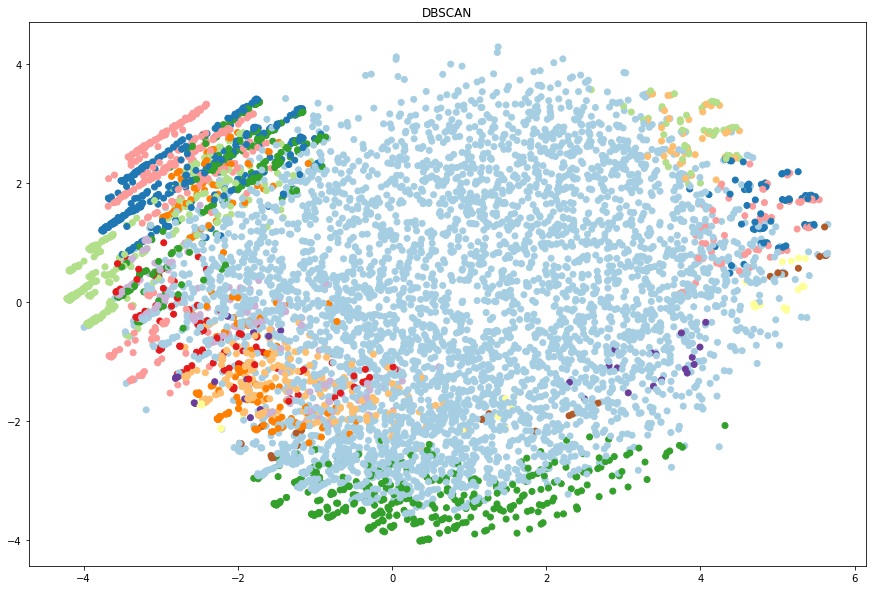

In [12]:
y_pred = dbscan.fit_predict(X)
pca = PCA(n_components=2)
X = pca.fit_transform(X)
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

In [13]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.scatter(X[:,0], X[:,2],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    print(X)

In [14]:
dbscan(X,3,2)

IndexError: index 2 is out of bounds for axis 1 with size 2